In [11]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

import pandas as pd
import numpy as np
import xarray as xr

import cmocean as cmo
import hvplot.xarray


## Campo multidimensionais (nD)

![](https://simulatingcomplexity.files.wordpress.com/2014/11/netcdf-file-structure.png)

**O que são campos multidimensionais?**

- 1D: série temporal ou perfil
- nD: multidimensional:
    - (tempo,profundidade), 
    - (tempo,latitude,longitude),
    - (tempo,profundidade,latitude,longitude)
    - etc
- modelos, satélites, etc

**Formato padrão de armazenamento**

- ASCII: legível, mas pesado (csv, dat)
- Binário: ilegível, mas leve (bin)
- MatLab: mat
- NetCDF: combina o melhor dos mundos (nc, cdf)
- **Net**work **C**ommon **D**ata **F**ormat
    - atributos como metadados em ASCII
    - dados em binário

In [17]:
!ncdump -h ../dados/nino34_ERA5.nc

netcdf nino34_ERA5 {
dimensions:
	longitude = 201 ;
	latitude = 41 ;
	expver = 2 ;
	time = 500 ;
variables:
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int expver(expver) ;
		expver:long_name = "expver" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:00.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short sst(time, expver, latitude, longitude) ;
		sst:scale_factor = 0.000162757933026109 ;
		sst:add_offset = 298.596354167908 ;
		sst:_FillValue = -32767s ;
		sst:missing_value = -32767s ;
		sst:units = "K" ;
		sst:long_name = "Sea surface temperature" ;

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2020-09-30 21:02:53 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data3/adaptor.mars.internal-1601499573.25794-28066-9-4d805da6-89b7-450e-

**Leitura de arquivos netcdf no python - xarray**

- alternativa aplicada à ciência das terras
- precisamos dos metadados
- rotulados/nomeados (labeled)
- netcdf4: somente por índices

![](http://xarray.pydata.org/en/stable/_images/dataset-diagram.png)

### O que é o Xarray?

- inspirado no pandas
- numpy, matplotlib, cartopy, pandas e dask
- novas estruturas aplicadas à campos nD:
    - xr.DataArray() - dados + metadados
    - xr.Dataset() - diversos xr.DataArray()

In [13]:
import xarray as xr

# ler um unico arquivo:
ds = xr.open_dataset('/home/danilo/Research/data/OAFlux/raw_data/ts_oaflux_2014.nc')

# visualizando um dataset
ds

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 40, time: 365)
Coordinates:
  * lon      (lon) float32 300.5 301.5 302.5 303.5 ... 336.5 337.5 338.5 339.5
  * lat      (lat) float32 -35.5 -34.5 -33.5 -32.5 -31.5 ... -3.5 -2.5 -1.5 -0.5
  * time     (time) int32 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Data variables:
    tmpsf    (time, lat, lon) float64 ...
    err      (time, lat, lon) float32 ...
Attributes:
    creation_date:  MAY 2015
    description:    WHOI Objectively Analyzed air-sea Fluxes (OAFlux) Project
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://oaflux.whoi.edu

In [14]:
# visualizando um dataarray
ds["tmpsf"]

<xarray.DataArray 'tmpsf' (time: 365, lat: 36, lon: 40)>
[525600 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 300.5 301.5 302.5 303.5 ... 336.5 337.5 338.5 339.5
  * lat      (lat) float32 -35.5 -34.5 -33.5 -32.5 -31.5 ... -3.5 -2.5 -1.5 -0.5
  * time     (time) int32 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Attributes:
    comments:  daily mean sea surface temperature
    units:     degree C

In [18]:
# dimensões possuem nomes
ds['tmpsf'].dims

('time', 'lat', 'lon')

**Algumas definições/métodos**

- ```.coords``` (coordenadas)
    - matriz 1D com coordenadas
    - podemos pensar em ticklabels
    
- ```.attrs``` (atributos)
    - dicionário de DataArray

In [20]:
# variáveis como coordenadas
ds['tmpsf'].coords

Coordinates:
  * lon      (lon) float32 300.5 301.5 302.5 303.5 ... 336.5 337.5 338.5 339.5
  * lat      (lat) float32 -35.5 -34.5 -33.5 -32.5 -31.5 ... -3.5 -2.5 -1.5 -0.5
  * time     (time) int32 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365

In [30]:
ds.tmpsf.lon

<xarray.DataArray 'lon' (lon: 40)>
array([300.5, 301.5, 302.5, 303.5, 304.5, 305.5, 306.5, 307.5, 308.5, 309.5,
       310.5, 311.5, 312.5, 313.5, 314.5, 315.5, 316.5, 317.5, 318.5, 319.5,
       320.5, 321.5, 322.5, 323.5, 324.5, 325.5, 326.5, 327.5, 328.5, 329.5,
       330.5, 331.5, 332.5, 333.5, 334.5, 335.5, 336.5, 337.5, 338.5, 339.5],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 300.5 301.5 302.5 303.5 ... 336.5 337.5 338.5 339.5
Attributes:
    long_name:  longitude
    units:      degrees
    range:      0.5 to 359.5

In [22]:
ds.coords['lon']

<xarray.DataArray 'lon' (lon: 40)>
array([300.5, 301.5, 302.5, 303.5, 304.5, 305.5, 306.5, 307.5, 308.5, 309.5,
       310.5, 311.5, 312.5, 313.5, 314.5, 315.5, 316.5, 317.5, 318.5, 319.5,
       320.5, 321.5, 322.5, 323.5, 324.5, 325.5, 326.5, 327.5, 328.5, 329.5,
       330.5, 331.5, 332.5, 333.5, 334.5, 335.5, 336.5, 337.5, 338.5, 339.5],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 300.5 301.5 302.5 303.5 ... 336.5 337.5 338.5 339.5
Attributes:
    long_name:  longitude
    units:      degrees
    range:      0.5 to 359.5

In [22]:
# atributos:
ds.attrs

{'creation_date': 'MAY 2015',
 'description': 'WHOI Objectively Analyzed air-sea Fluxes (OAFlux) Project',
 'project_PIs': 'Lisan Yu, Bob Weller',
 'website': 'http://oaflux.whoi.edu'}

In [24]:
# dados:
ds.tmpsf.data

array([[[        nan,         nan, 25.82999992, ..., 19.39999962,
         19.6099987 , 19.53999901],
        [        nan,         nan,         nan, ..., 20.3599987 ,
         21.1099987 , 21.25      ],
        [        nan,         nan,         nan, ..., 22.02999878,
         22.65999985, 22.42000008],
        ...,
        [        nan,         nan,         nan, ..., 26.6099987 ,
         26.20999908, 26.18000031],
        [        nan,         nan,         nan, ..., 26.45999908,
         26.19999886, 26.14999962],
        [        nan,         nan,         nan, ..., 26.34999847,
         26.19999886, 26.17000008]],

       [[        nan,         nan, 25.11999893, ..., 19.18000031,
         19.53999901, 19.51000023],
        [        nan,         nan,         nan, ..., 20.21999931,
         21.12999916, 21.26000023],
        [        nan,         nan,         nan, ..., 21.81999969,
         22.57999992, 22.42000008],
        ...,
        [        nan,         nan,         nan, ..., 2

Esses dados estão com uma cara de uma matriz do numpy ...

In [34]:
type(ds.tmpsf.data)

numpy.ndarray

Lendo diversos arquivos de uma vez só:

In [25]:
!ls /home/danilo/Research/data/OAFlux/raw_data/*_oaflux_2014.nc

/home/danilo/Research/data/OAFlux/raw_data/lh_oaflux_2014.nc
/home/danilo/Research/data/OAFlux/raw_data/qa_oaflux_2014.nc
/home/danilo/Research/data/OAFlux/raw_data/sh_oaflux_2014.nc
/home/danilo/Research/data/OAFlux/raw_data/ta_oaflux_2014.nc
/home/danilo/Research/data/OAFlux/raw_data/ts_oaflux_2014.nc
/home/danilo/Research/data/OAFlux/raw_data/ws_oaflux_2014.nc


In [26]:
# abrir diversos arquivos de uma vez
ds = xr.open_mfdataset('/home/danilo/Research/data/OAFlux/raw_data/*_oaflux_2014.nc', compat='override')
ds

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 40, time: 365)
Coordinates:
  * lon      (lon) float32 300.5 301.5 302.5 303.5 ... 336.5 337.5 338.5 339.5
  * lat      (lat) float32 -35.5 -34.5 -33.5 -32.5 -31.5 ... -3.5 -2.5 -1.5 -0.5
  * time     (time) int32 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Data variables:
    hum2m    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 40), meta=np.ndarray>
    err      (time, lat, lon) float32 dask.array<chunksize=(365, 36, 40), meta=np.ndarray>
    lhtfl    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 40), meta=np.ndarray>
    shtfl    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 40), meta=np.ndarray>
    tmp2m    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 40), meta=np.ndarray>
    tmpsf    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 40), meta=np.ndarray>
    wnd10    (time, lat, lon) float64 dask.array<chunksize=(365, 36, 40), meta=np.ndarray>
Attributes:
    creation_date:  MAY 2015
    description:    WHOI Objectively Analyzed air-sea Fluxes (OAFlux) Project
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://oaflux.whoi.edu

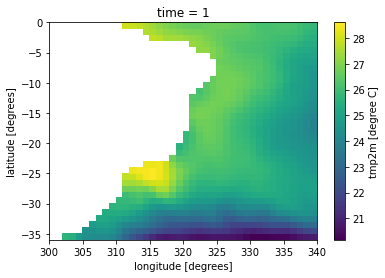

In [28]:
_ = ds.isel(time=0).tmp2m.plot.pcolormesh()

Com poucas linhas criamos uma figura já com algumas customizações que são baseadas nos atributos do Dataset.

**note**: coordenadas são ticklabels!

In [30]:
# obtendo a média no tempo
ds.mean(dim='time')

<xarray.Dataset>
Dimensions:  (time: 365)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Data variables:
    hum2m    (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>
    err      (time) float32 dask.array<chunksize=(365,), meta=np.ndarray>
    lhtfl    (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>
    shtfl    (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>
    tmp2m    (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>
    tmpsf    (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>
    wnd10    (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>

### Extraindo dados por indexamento

- similar ao pandas
- label
- posicionamento (index)

In [ ]:
# se estiver no google colab, rode:
!wget --directory-prefix=../dados/ https://raw.githubusercontent.com/nilodna/python-basico/feature_iojr-shortcourse/dados/nino34_ERA5.nc

In [31]:
ds = xr.open_dataset('/home/danilo/Research/data/ERA5/SSTreanalysis/atlantic_sst2.nc')
ds = ds.mean(dim='expver')

In [41]:
# selecionar registros para um ano específico
# ds.sel(time='2010-08')

# selecionando tempo com o comando slice (recorte)
# ds.sel(time=slice('2010','2019'))

In [43]:
# ds.longitude.values

In [53]:
# selecionar uma coordenada específica, utilizando o método do
# mais próximo. 
ds.sel(longitude=130, latitude=-2.5, method='nearest')

# Note que sem o método 'nearest', não é encontrado nenhum  valor
# ds.sel(longitude=-40, latitude=-30)

<xarray.Dataset>
Dimensions:    (time: 501)
Coordinates:
    longitude  float32 9.0
    latitude   float32 -2.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    sst        (time) float32 300.5 301.1 301.4 301.0 ... 297.3 297.9 298.2

**Position-based indexing**: .isel()

- indexação (posição) referente à matriz 1D da coordenada/dimensão

In [48]:
# seleção com base no tempo
ds.isel(time=0)['sst']

<xarray.DataArray 'sst' (latitude: 193, longitude: 277)>
array([[298.20505, 298.18738, 298.14066, ...,       nan,       nan,
              nan],
       [298.26456, 298.26862, 298.24118, ...,       nan,       nan,
              nan],
       [298.33112, 298.3477 , 298.3349 , ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ..., 294.1611 , 294.17575,
        294.17874],
       [      nan,       nan,       nan, ..., 294.10538, 294.11707,
        294.13474],
       [      nan,       nan,       nan, ..., 294.08093, 294.088  ,
        294.11517]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -60.0 -59.75 -59.5 -59.25 ... 8.5 8.75 9.0
  * latitude   (latitude) float32 24.0 23.75 23.5 23.25 ... -23.5 -23.75 -24.0
    time       datetime64[ns] 1979-01-01

In [51]:
# seleção de uma coordenada pelo índice desta na coordenada referente
ds.isel(longitude=slice(0,10), latitude=slice(0,10))

<xarray.Dataset>
Dimensions:    (latitude: 10, longitude: 10, time: 501)
Coordinates:
  * longitude  (longitude) float32 -60.0 -59.75 -59.5 ... -58.25 -58.0 -57.75
  * latitude   (latitude) float32 24.0 23.75 23.5 23.25 ... 22.25 22.0 21.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    sst        (time, latitude, longitude) float32 298.2 298.2 ... 301.8 301.8

### Cálculos de alto nível

- groupby
- resample
- rolling

In [56]:
# agrupamento temporal por ano, aplica-se a média
ds.groupby('time.year').mean()

<xarray.Dataset>
Dimensions:    (latitude: 193, longitude: 277, year: 42)
Coordinates:
  * longitude  (longitude) float32 -60.0 -59.75 -59.5 -59.25 ... 8.5 8.75 9.0
  * latitude   (latitude) float32 24.0 23.75 23.5 23.25 ... -23.5 -23.75 -24.0
  * year       (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020
Data variables:
    sst        (year, latitude, longitude) float32 299.2 299.2 ... 293.2 293.1

In [57]:
# agrupamento temporal por estação do ano, aplica-se a média
ds_season = ds.groupby('time.season').mean()
ds_season

<xarray.Dataset>
Dimensions:    (latitude: 193, longitude: 277, season: 4)
Coordinates:
  * longitude  (longitude) float32 -60.0 -59.75 -59.5 -59.25 ... 8.5 8.75 9.0
  * latitude   (latitude) float32 24.0 23.75 23.5 23.25 ... -23.5 -23.75 -24.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst        (season, latitude, longitude) float32 298.3 298.3 ... 290.7 290.6

In [61]:
# reamostragem de mensal para anual, aplica-se a média
ds_year = ds.resample(time='Y').mean()
ds_year

<xarray.Dataset>
Dimensions:    (latitude: 193, longitude: 277, time: 42)
Coordinates:
  * time       (time) datetime64[ns] 1979-12-31 1980-12-31 ... 2020-12-31
  * longitude  (longitude) float32 -60.0 -59.75 -59.5 -59.25 ... 8.5 8.75 9.0
  * latitude   (latitude) float32 24.0 23.75 23.5 23.25 ... -23.5 -23.75 -24.0
Data variables:
    sst        (time, latitude, longitude) float32 299.2 299.2 ... 293.2 293.1

In [81]:
# média móvel de 3 meses
ds.rolling(time=3).mean()

<xarray.Dataset>
Dimensions:    (latitude: 193, longitude: 277, time: 501)
Coordinates:
  * longitude  (longitude) float32 -60.0 -59.75 -59.5 -59.25 ... 8.5 8.75 9.0
  * latitude   (latitude) float32 24.0 23.75 23.5 23.25 ... -23.5 -23.75 -24.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan ... 290.8 290.8

**Visualização de dados**

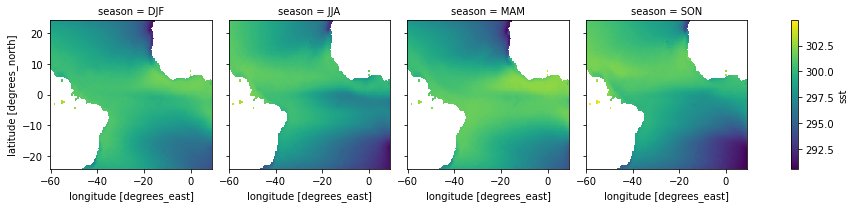

In [71]:
gax = ds_season.sst.plot(col='season')

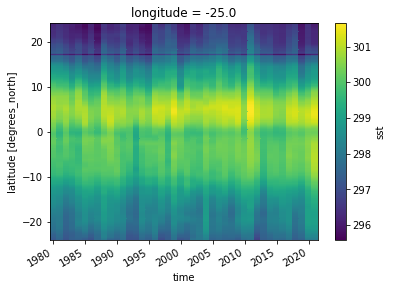

In [94]:
# hovmoller?
ax = ds_year.sel(longitude=-25, method='nearest').sst.plot.pcolormesh(x='time')

**Explorando arquivos netcdf iterativamente**

- holoviews

```python
    conda install -c conda-forge hvplot
```

In [72]:
import hvplot.xarray

ds.sst.hvplot(x='longitude', y='latitude', groupby="time", cmap='RdBu')

:DynamicMap   [time]
   :Image   [longitude,latitude]   (sst)

**Plotando campos vetoriais**

- ```quiver```

In [104]:
ds = xr.open_dataset('/home/danilo/Research/data/Mercator/merc2014.nc')
ds['temperature'] -= 273.15
ds['temperature'].attrs['units'] = 'degC'
ds['temperature'].attrs['unit_long'] = 'Celsius degrees'

In [118]:
ds_ = ds.isel(time=0, depth=0)

# calcular a intensidade da corrente
ds_['speed'] = (('latitude', 'longitude'), np.sqrt(ds_['u'].values**2, ds_['v'].values**2))

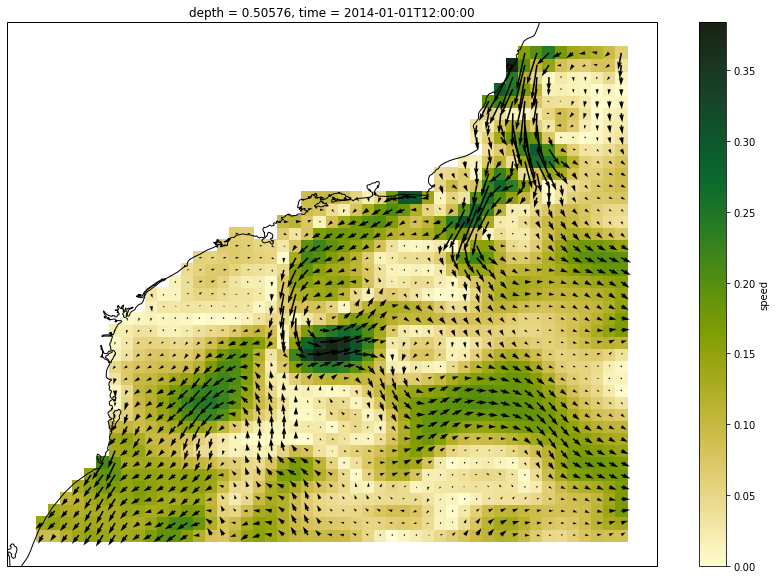

In [130]:
import cmocean as cmo # pacote de cores oceanográficas: !conda install cmocean

fig,ax = plt.subplots(figsize=(15,10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines('10m')

_ = ds_.speed.plot.pcolormesh(ax=ax, cmap=cmo.cm.speed)

ax.quiver(ds_.longitude.values, ds_.latitude.values, 
          ds_['u'].values, ds_.v.values)

**Batimetria (ETOPO1)**

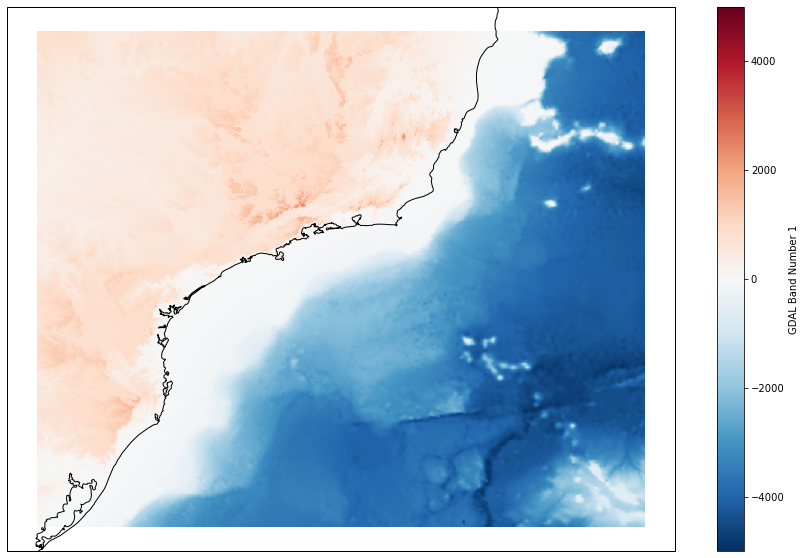

In [74]:
ds = xr.open_dataset('../dados/etopo1.nc')

fig,ax = plt.subplots(figsize=(15,10), 
                      subplot_kw={'projection': ccrs.PlateCarree()})

_= ds['Band1'].plot.pcolormesh(ax=ax)

ax.coastlines('10m')

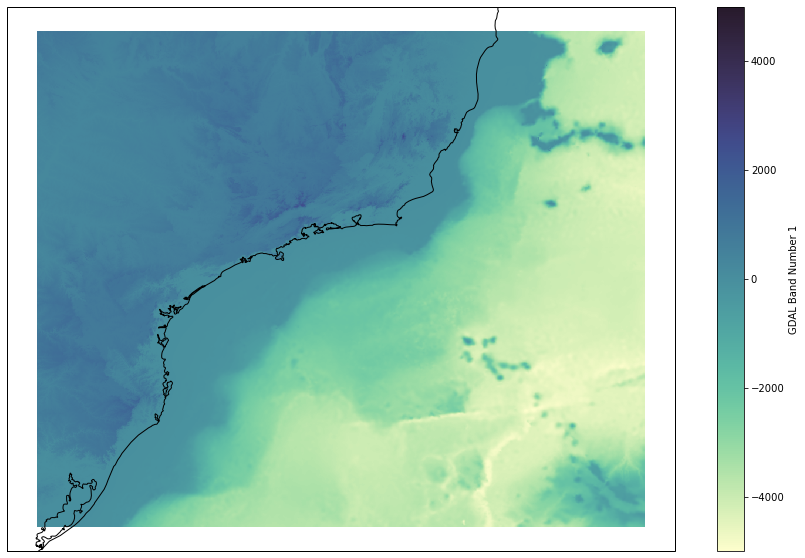

In [137]:
fig,ax = plt.subplots(figsize=(15,10), 
                      subplot_kw={'projection': ccrs.PlateCarree()})

_= ds['Band1'].plot.pcolormesh(ax=ax, cmap=cmo.cm.deep)

ax.coastlines('10m')

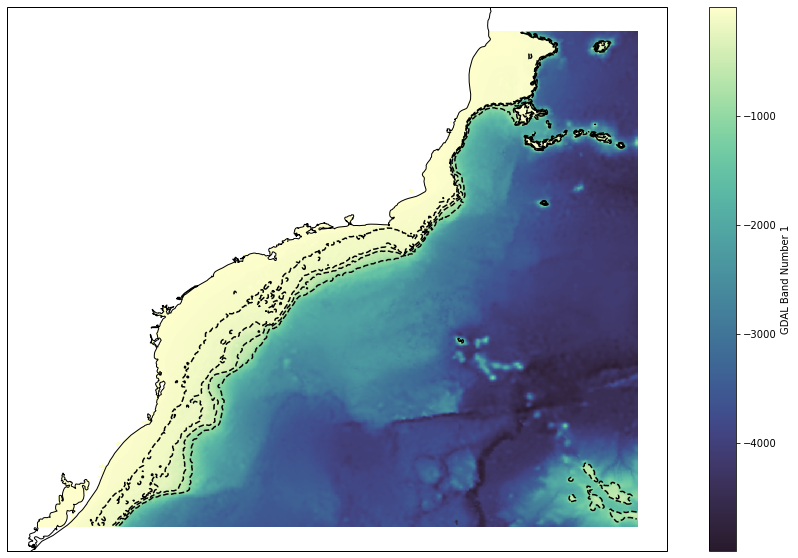

In [75]:
ds_ = ds.where(ds['Band1'] < 0, drop=True)

fig,ax = plt.subplots(figsize=(15,10), 
                      subplot_kw={'projection': ccrs.PlateCarree()})

_= ds_['Band1'].plot.pcolormesh(ax=ax, cmap=cmo.cm.deep_r)

_= ds_['Band1'].plot.contour(ax=ax, levels=[-1000, -500, -200, -100], colors=('k'))

ax.coastlines('10m')

**Leitura de arquivos GRIB:**

- instalação:
```python
    conda install -c conda-forge cfgrib
```

- sintaxe:
```python
    ds = xr.open_dataset('nome_arquivo.grib', engine='cfgrib')
```

In [76]:
ds_ = xr.tutorial.load_dataset('era5-2mt-2019-03-uk.grib', engine='cfgrib')


Text(0.5, 1.0, 'ERA5 - 2m temperature British Isles March 2019')

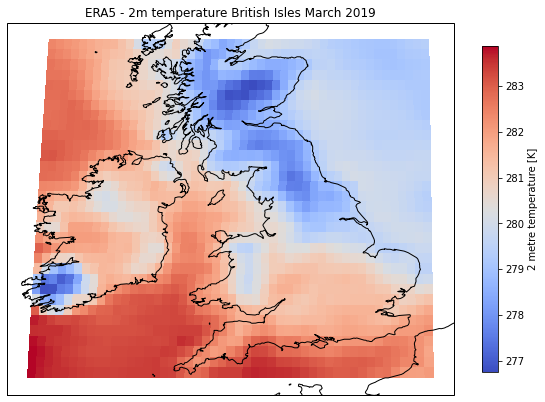

In [102]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines(resolution='10m')
plot = ds_.t2m[0].plot(cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.6})
plt.title('ERA5 - 2m temperature British Isles March 2019')

Pacote de interesse:

- xgcm + xroms: pós-processamento de saídas de modelo (ROMS):

    - https://xgcm.readthedocs.io/en/latest/
    - https://github.com/xoceanmodel/xroms


- xclim: cálculo de índices climáticos:

    - https://xclim.readthedocs.io/en/stable/


- metpy: ferramenta para dados meteorológicos

    - https://unidata.github.io/MetPy/latest/index.html


- dask: processamento paralelizados em HPC:

    - https://dask.org/

Exemplo de análise com uma saída do modelo **ROMS**

Fonte: extraído do próprio site do xarray: http://xarray.pydata.org/en/stable/examples/ROMS_ocean_model.html

In [5]:
ds = xr.tutorial.open_dataset('ROMS_example.nc', chunks={'ocean_time': 1})

if ds.Vtransform == 1:
    Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
    z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
elif ds.Vtransform == 2:
    Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
    z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho

ds.coords['z_rho'] = z_rho.transpose()   # needing transpose seems to be an xarray bug
ds.salt

<xarray.DataArray 'salt' (ocean_time: 2, s_rho: 30, eta_rho: 191, xi_rho: 371)>
dask.array<open_dataset-a55aa9addf35a947491528efee4ae52esalt, shape=(2, 30, 191, 371), dtype=float32, chunksize=(1, 30, 191, 371), chunktype=numpy.ndarray>
Coordinates:
    Cs_r        (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    lon_rho     (xi_rho, eta_rho) float64 dask.array<chunksize=(371, 191), meta=np.ndarray>
    hc          float64 20.0
    h           (xi_rho, eta_rho) float64 dask.array<chunksize=(371, 191), meta=np.ndarray>
    lat_rho     (xi_rho, eta_rho) float64 dask.array<chunksize=(371, 191), meta=np.ndarray>
    Vtransform  int32 2
  * ocean_time  (ocean_time) datetime64[ns] 2001-08-01 2001-08-08
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    z_rho       (s_rho, xi_rho, eta_rho, ocean_time) float64 dask.array<chunksize=(30, 371, 191, 1), meta=np.ndarray>
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  salinity
    time:       ocean_time
    field:      salinity, scalar, series

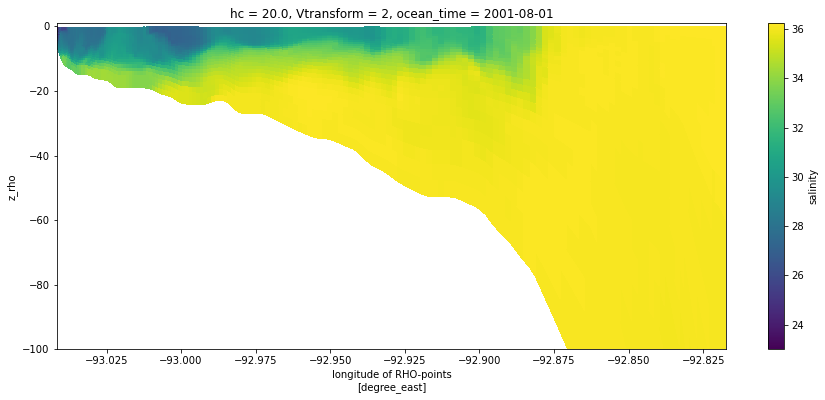

In [6]:
section = ds.salt.isel(xi_rho=50, eta_rho=slice(0, 167), ocean_time=0)
section.plot(x='lon_rho', y='z_rho', figsize=(15, 6), clim=(25, 35))
plt.ylim([-100, 1]);

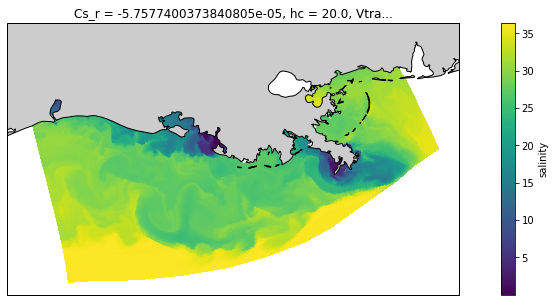

In [10]:
proj = ccrs.LambertConformal(central_longitude=-92, central_latitude=29)
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection=proj)
ds.salt.isel(s_rho=-1, ocean_time=0).plot(x='lon_rho', y='lat_rho',
                                          transform=ccrs.PlateCarree())

coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k', facecolor='0.8')
ax.add_feature(coast_10m)

# Cálculo do Índice do El Niño 3.4

[[fonte]](https://ncar.github.io/PySpark4Climate/tutorials/Oceanic-Ni%C3%B1o-Index/#Computational-Recipe)

Receita da lógica/algoritmo:
- média espacial na região do Niño 3.4 (ponderada pela lat/lon)
- cálculo da climatologia mensal
- cálculo da anomalia da média espacial
- média móvel de 3 meses para suavização

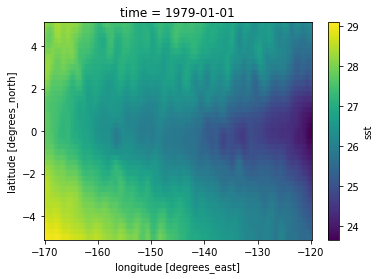

In [82]:
# leitura de arquivos ERA5
ds = xr.open_dataset('../dados/nino34_ERA5.nc')
ds = ds.mean(dim='expver')

# converter de Kelvin para oC
ds['sst'] -= 273.15

_ = ds.isel(time=0).sst.plot.pcolormesh()

In [78]:
def global_mean_sst(dset):
    # source: https://ncar.github.io/PySpark4Climate/tutorials/Oceanic-Ni%C3%B1o-Index/#Computational-Recipe
    # Find mean temperature for each latitude
    mean_sst_lat = dset.sst.mean(dim='longitude')

    # Find Weighted mean of those values
    num = (np.cos(dset.latitude) * mean_sst_lat).sum(dim='latitude')
    denom = np.sum(np.cos(dset.latitude))

    # Find mean global temperature
    mean_global_temp = num / denom

    return mean_global_temp

In [87]:
# média espacial ingênua, necessário ponderar pela coordenadas,
# pois a variação de lat/lon implica em uma área diferente
ds_avg_1 = ds.mean(dim=['latitude', 'longitude'])
ds_avg_2 = global_mean_sst(ds)

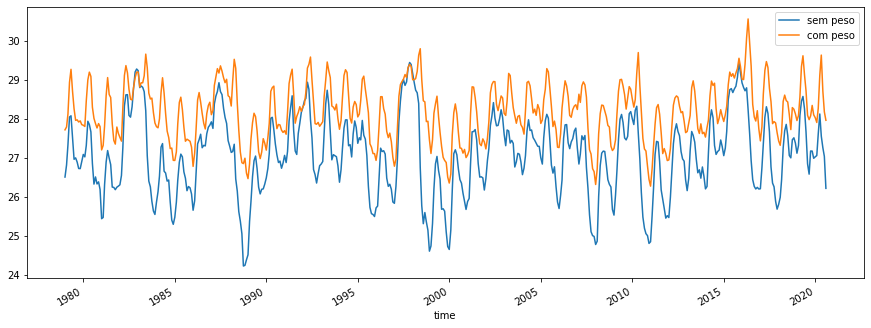

In [88]:
# diferença entre os dois tipos de média espacial
fig,ax = plt.subplots(figsize=(15,5))

ds_avg_1.sst.plot(ax=ax, label='sem peso')

ds_avg_2.plot(ax=ax, label='com peso')

plt.legend()

In [89]:
# climatologia utilizando groupby
ds_clim = ds_avg_1.sel(time=slice('1980','2016')).groupby('time.month').mean('time')
ds_clim

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month) float32 26.5 26.65 27.15 27.74 ... 26.73 26.7 26.71 26.58

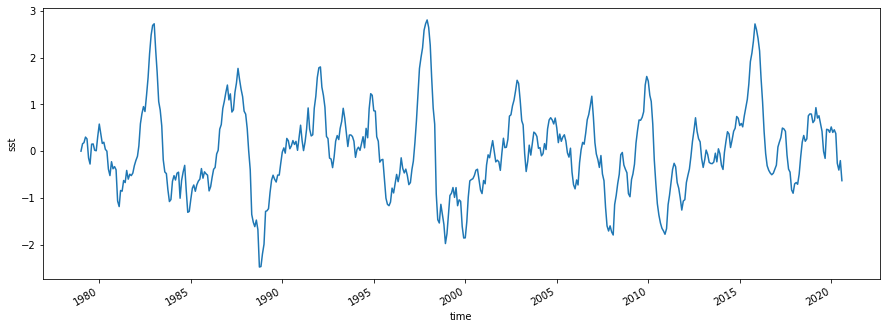

In [91]:
# anomalia espacial utilizando o groupby sem método estatístico
ds_anom = ds_avg_1.groupby('time.month') - ds_clim

ax = ds_anom.sst.plot(figsize=(15,5))

# ax.grid('--')

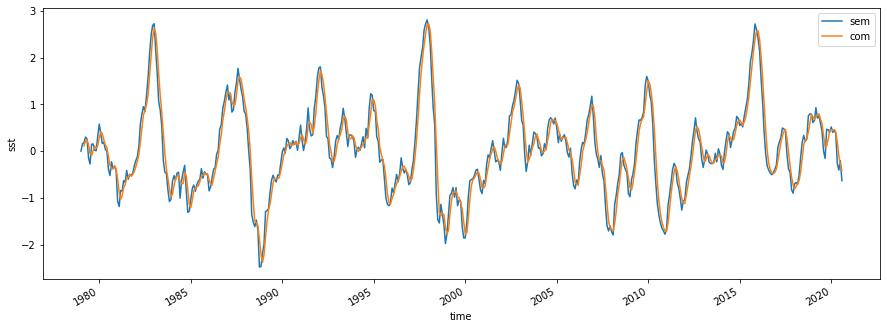

In [77]:
# suavização com média móvel de 3 meses para calcular o 
# Oceanic Nino Index (ONI)
ds_oni = ds_anom.rolling(time=3).mean()

fig,ax = plt.subplots(figsize=(15,5))
ds_anom.sst.plot(ax=ax, label='sem')
ds_oni.sst.plot(ax=ax, label='com')
plt.legend()

In [31]:
ds_anom

<xarray.Dataset>
Dimensions:  (time: 500)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8
Data variables:
    sst      (time) float32 -5.913e-05 0.1587 0.1814 ... -0.4047 -0.2027 -0.6319

### Bonus: vamos comparar com o ONI da NOAA (oficial)

In [93]:
# getting the ONI computed by NOAA from the website
url = 'https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt'

oni = pd.read_csv(url, sep='\s+')
dt = pd.date_range(start='1950-01', end='2021-06', freq='M')
oni.index = dt

oni = oni.drop(['SEAS', 'YR'], axis=1)
oni

,TOTAL,ANOM
1950-01-31,24.72,-1.53
1950-02-28,25.17,-1.34
1950-03-31,25.75,-1.16
1950-04-30,26.12,-1.18
1950-05-31,26.32,-1.07
...,...,...
2021-01-31,25.59,-1.05
2021-02-28,25.94,-0.93
2021-03-31,26.46,-0.84
2021-04-30,27.03,-0.65


In [79]:
ONI = xr.Dataset() # cria um Dataset vazio
ONI['time'] = ds_oni.time # cria uma dimensao (time)
ONI['oni_era5'] = (('time'), ds_oni.sst.values) # cria uma variavel (sst) - oni-era5
ONI['oni_noaa'] = (('time'), oni['1979':'2020-08']['ANOM'].values) # cria uma variavel (sst) - oni-noaa
ONI

<xarray.Dataset>
Dimensions:   (time: 500)
Coordinates:
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    oni_era5  (time) float32 nan nan 0.11336517 ... -0.2890142 -0.413105
    oni_noaa  (time) float64 0.03 0.07 0.2 0.28 0.23 ... -0.01 -0.25 -0.4 -0.62

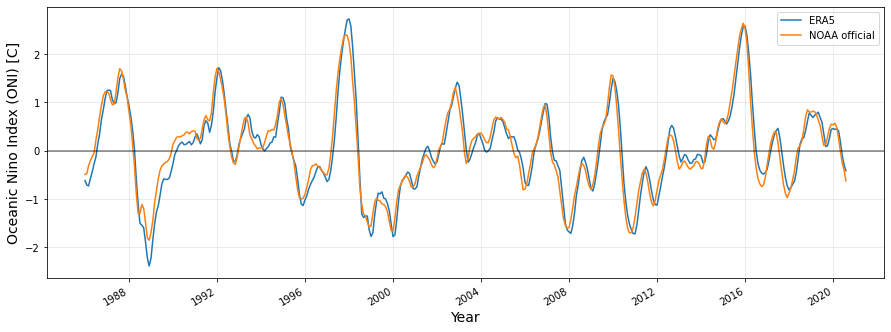

In [81]:
fig,ax = plt.subplots(figsize=(15,5))

ONI.sel(time=slice('1986', '2020'))['oni_era5'].plot(ax=ax, label='ERA5')
ONI.sel(time=slice('1986', '2020'))['oni_noaa'].plot(ax=ax, label='NOAA official')

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Oceanic Nino Index (ONI) [C]", fontsize=14)
plt.axhline(0, c='k', alpha=.5)
plt.grid('--', alpha=.3)
plt.legend()